In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [5]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [6]:
df=data.loc['0':'207']

In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [9]:
X1 = df[['PM2.5y1','PM2.5y2','PM2.5y3','year', 'month', 'day']]
Y1 = df['PM2.5']

In [10]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [11]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=24)

In [20]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=7,
                                      max_features=0.1,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=7, max_features=0.1,
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8340031707714246

Score on test data: 0.521003756790015

Root Mean Squared Error: 52.686502167987925

Overall model accuracy: 0.521003756790015


In [22]:
test=data.loc['207':'259']
X=test[['PM2.5y1','PM2.5y2','PM2.5y3','year', 'month', 'day']]
X

,PM2.5y1,PM2.5y2,PM2.5y3,year,month,day
207,302.818571,217.428571,106.245714,2019,12,29
208,316.292857,264.292857,32.319143,2020,1,5
209,241.932857,191.864286,95.229429,2020,1,12
210,253.915714,237.660000,216.040000,2020,1,19
211,128.998571,173.172857,134.044286,2020,1,26
212,187.365714,143.550000,138.318571,2020,2,2
213,146.527143,193.068571,160.888571,2020,2,9
214,193.267143,109.957143,97.521429,2020,2,16
215,110.288571,166.732857,99.651429,2020,2,23
216,108.875000,109.975714,89.537143,2020,3,1


In [23]:
predict=grad_boost.predict(X)

In [24]:
predict

array([189.63368747, 158.81988278, 154.6144933 , 177.21466619,
       151.05687761, 136.57857755, 165.7827785 , 139.7573124 ,
       130.69996487, 101.62440765, 102.15365788, 102.01575789,
       100.67630645,  96.48041938,  91.77644719,  88.03506701,
       115.32664791, 122.7899783 ,  90.35175957, 119.39281265,
        99.42982252, 114.27115609, 106.46100868,  78.69733358,
        90.05327357,  73.17144086,  61.9511571 ,  62.88016421,
        57.61440876,  55.65197645,  55.54498721,  63.90152913,
        58.98178206,  56.87621151,  56.56600687,  59.49590713,
        63.81396813,  59.02349802,  57.47980502,  59.02097327,
        82.30891373, 100.35854718, 107.53357329, 142.85741768,
       163.81316034, 206.92851578, 211.37975947, 194.26452712,
       187.62245803, 212.32037684, 223.99726262, 205.03547005,
       218.33154736])

In [25]:
dates=data.loc['207':'259','From Date']

In [26]:
X['From Date']=dates.values

In [27]:
X.columns

Index(['PM2.5y1', 'PM2.5y2', 'PM2.5y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [28]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [29]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [30]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [31]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

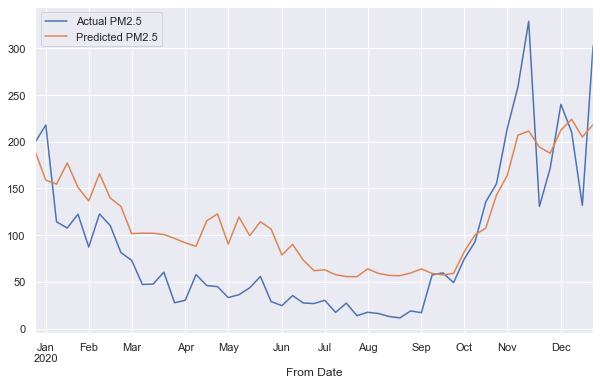

In [32]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [33]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

50.3136467717096

In [34]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 42.43719165358598
MSE: 2775.867510697396
RMSE: 52.686502167987925
R-Squared: 0.521003756790015


In [35]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 44.58952272503751
MSE: 2531.463051468364
RMSE: 50.3136467717096
R-Squared: 0.5965700205503535


In [36]:
import pickle
filename = 'PM2.5_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [37]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.521003756790015


# 3rd plot

In [38]:
testcase = pd.DataFrame()

In [39]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [40]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [41]:
testcase

,test,pred,Corrected
155,302.818571,209.617369,262.303871
156,316.292857,155.284818,207.971320
157,241.932857,165.331205,218.017707
158,253.915714,182.119911,234.806414
159,128.998571,178.920526,126.234024
160,187.365714,155.440728,208.127231
161,146.527143,159.931524,107.245022
162,193.267143,117.242657,169.929159
163,110.288571,132.755952,80.069450
164,108.875000,99.212405,151.898907


In [42]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [43]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8288008281485466

In [44]:
test2020=pd.DataFrame()

In [45]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [46]:
test2020.index=test.index

In [47]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

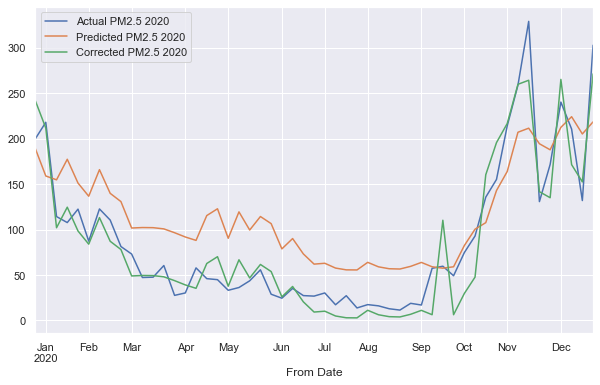

In [48]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [49]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.9047196253945385